**Data Science Challenge - Hakeem Usmans's Submission**

---

Tasks
1.   Load data from a csv file into a Pandas Dataframe
2.   Basic featurisation of Text data
3. Training a classifier


**TAKE NOTE** **Access the data file from** [HERE](https://drive.google.com/open?id=1EcJ7SqpGHgjk1HDR4Q2P74n8LVl_ywU1) and mount from Google Drive to download the dataset.
Do the same for this cloud pic [HERE](https://doc-0s-5g-docs.googleusercontent.com/docs/securesc/26005c7findssmsrc1n8k4pblctj87d0/ofulpnf6dq41hnhicvfoj19ll2lcec9l/1589628525000/14250705583864808459/14250705583864808459/11FpC0D6CXS6k3n3EauZliI_CGo6X7Qjz?e=download&authuser=0&nonce=tcor8i5rpcd3u&user=14250705583864808459&hash=oaqpaje92ce6t4i6r8nhg8458fqau50p)

Submittion for Data Science Challenge

In [1]:
#Import libraries

import pandas as pd
import seaborn as sns

import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import string
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Downloading datasets from Google Drive to Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
text_data = '/content/drive/My Drive/file.csv'

img = '/content/drive/My Drive/cloud.jpg'

In [0]:
df = pd.read_csv(text_data)

In [5]:
print("Dataset is of shape: ", df.shape, " with columns", df.columns)

Dataset is of shape:  (13077, 5)  with columns Index(['Unnamed: 0', 'ID', 'Country', 'Verbatim', 'Category'], dtype='object')


In [6]:
df.head(10)

,Unnamed: 0,ID,Country,Verbatim,Category
0,0,5937,D,The very effective when i go to they help me i...,Customer Service
1,1,5750,D,Their service is good and I do believe in thei...,Customer Service
2,2,5690,D,Their services like when you draw or do transa...,Customer Service
3,3,5789,D,Customer relations internet banking facilities...,Customer Service
4,4,5576,D,Their service is good and their customer servi...,Customer Service
5,5,5836,D,i havent had any issues with the bank the bank...,Customer Service
6,6,2222,A,Payments are handled well / don't take time to...,Customer Service
7,7,5806,D,Most of the time you get what you want in term...,Customer Service
8,8,6390,Z,Services are good. Everything about them is g...,Customer Service
9,9,5721,D,"The relationship I have with my banker, everyt...",Customer Service


In [7]:
pd.DataFrame(df.Category.unique()).values

array([['Customer Service'],
       ['Loans'],
       ['Digital Banking'],
       ['Sponsorship'],
       ['Benefits'],
       ['Advertising and Comms '],
       ['Accessibility'],
       ['Queue Times'],
       ['Ambience'],
       ['Security'],
       ['Treat you well / Approachable '],
       ['Information / Keep you informed '],
       ['Service Quality '],
       ['Process and Procedures '],
       ['Interest Rates'],
       ['Products and Services Range '],
       ['Reliable system / ATMs '],
       ['Flexibility '],
       ['Quality of staff '],
       ['Brand Image '],
       ['Money Management '],
       ['Loan Procedures'],
       ['Fees / Rates / Charges ']], dtype=object)

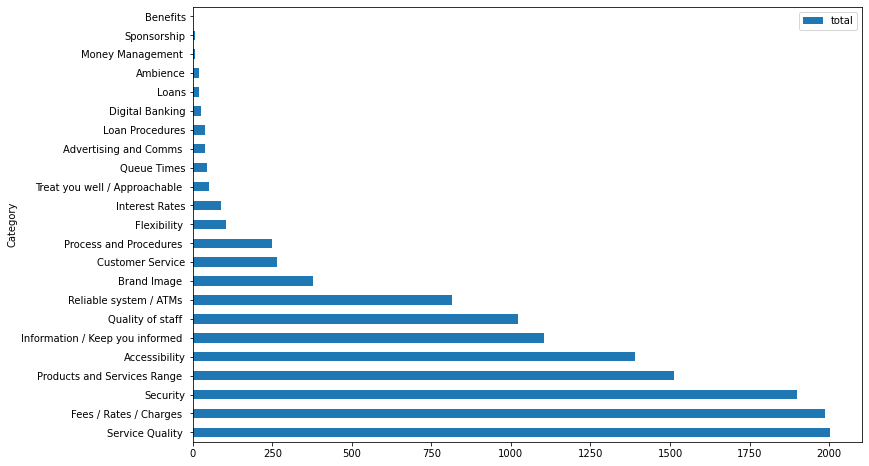

In [8]:
#visualisation to show distribution of categories across dataset

df_count_by_category = df['Category'].value_counts().reset_index()
df_count_by_category.columns = ['Category', 'total']
df_count_by_category.sort_values(by = ['total'],ascending=True)
df_count_by_category.plot.barh(x='Category', y='total',figsize=(12,8))

Build a wordcloud using words from df['Verbatim']. 

NB: StopWords should not be in the Word Cloud.

In [9]:
# Featurisation of Daya using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',
                        encoding='latin-1', ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(df['Verbatim']).toarray()
tfidf.vocabulary_ # Show the vocab ..



{'effective': 898,
 'help': 1150,
 'time': 2375,
 'bank': 357,
 'need': 1568,
 'atm': 292,
 'machines': 1429,
 'want': 2560,
 'withdraw': 2599,
 'times': 2405,
 'dont': 869,
 'help time': 1155,
 'bank need': 404,
 'atm machines': 296,
 'want withdraw': 2577,
 'service': 2178,
 'good': 1090,
 'services': 2199,
 'service good': 2188,
 'like': 1346,
 'transactions': 2425,
 'charge': 618,
 'services like': 2204,
 'customer': 767,
 'relations': 1985,
 'internet': 1269,
 'banking': 455,
 'facilities': 959,
 'making': 1447,
 'efficient': 900,
 'customer relations': 770,
 'internet banking': 1271,
 'banking facilities': 478,
 'good customer': 1095,
 'customer service': 772,
 'issues': 1295,
 'atms': 299,
 'money': 1488,
 'years': 2628,
 'bank bank': 367,
 'payments': 1712,
 'handled': 1122,
 'don': 867,
 'process': 1794,
 'time process': 2390,
 'terms': 2362,
 'time want': 2402,
 'think': 2372,
 'services good': 2203,
 'relationship': 1986,
 'banker': 443,
 'polite': 1761,
 'way': 2581,
 'bran

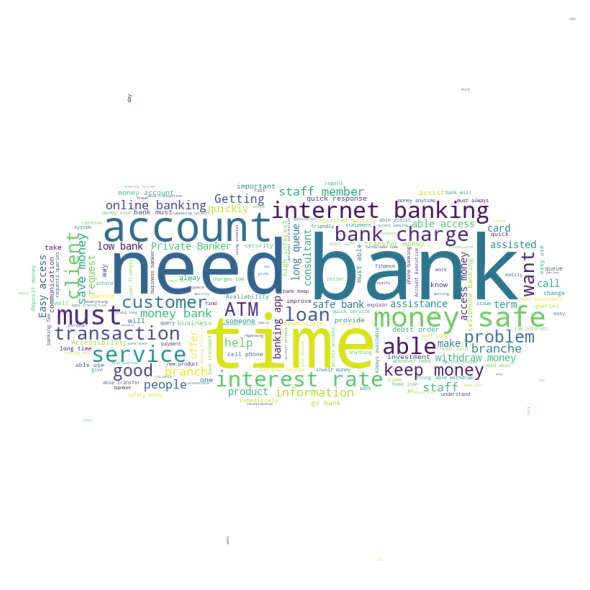

In [10]:
# Plot Wordcloud using words from df['Verbatim']

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import os


def create_wordCloud(text):
   mask = np.array(Image.open(img))

   
   stopwords = set(STOPWORDS)
 
   wc = WordCloud(background_color = "white",
                  mask=mask,
                  max_words=200,
                  stopwords=stopwords)
   
   text_str = ''.join(text.values)
  
   wc_obj = wc.generate(text_str)
   plt.figure(figsize = (8, 8), facecolor = None) 
   plt.imshow(wc_obj) 
   plt.axis("off") 
   plt.tight_layout(pad = 0) 
   plt.show() 

   wc.to_file("wc.png")
   
   files.download('wc.png')

create_wordCloud(df['Verbatim'])

Train any 2 models of your choice with accuracy greater than or equal to 65%

In [11]:
#I haven't done the training. Stuck!
#Train a model (in this case a RF classifier)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
#random

X = features

y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Model 1:RandomForestClassifier(RFC)
clf = RandomForestClassifier(n_estimators=500, max_depth=100, max_features="log2",random_state=0)
clf.fit(X_train,y_train)
print('RFC Training Accuracy is: ',clf.score(X_test,y_test))

#Model 2: GradientBoostingClassifier(GBC)
gClf = GradientBoostingClassifier(n_estimators=500)
gClf.fit(X_train,y_train)
print('\n GBC Training Accuracy is: ',gClf.score(X_test,y_test))


#I tried to use log2 to  remove skewness of variable in order to increase accuracy. 
#I also increased the number of estimators and used a code below to find some optimal parameters for the classifiers


RFC Training Accuracy is:  0.6081804281345565


KeyboardInterrupt: ignored

In [0]:
#Find good parameters 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV

X = features

y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(n_estimators=100, max_depth=100, max_features="auto",random_state=0)
param_grid = { 
    'n_estimators': [100 ,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,30,50,80,100,120,150,200,250,300]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train, y_train)
print('\n', CV_rfc.best_params_)
